In [199]:
import json
import pandas as pd
from utils import get_soup
import matplotlib.pyplot as plt

pd.set_option('display.max_row', None)
data = pd.read_csv('ratings.csv')

data = data.drop(1477)

In [200]:
rating = data.groupby(by=['작품명'])[['AGB']]

In [201]:
firstRating = rating.first()
firstRating.rename(columns = {'AGB':'First rating'}, inplace = True)

lastRating = rating.last()
lastRating.rename(columns = {'AGB':'Last rating'}, inplace = True)

avgRating = rating.mean()
avgRating.rename(columns = {'AGB':'Average rating'}, inplace = True)

In [202]:
rating1 = pd.merge(firstRating, lastRating, right_index= True, left_index=True)
rating2 = pd.merge(rating1, avgRating, right_index= True, left_index=True)

In [216]:
rating2['Last-First'] = rating2['Last rating'] - rating2['First rating']
rating2.drop(rating2[rating2['First rating'] > 90].index, inplace = True)
rating2['Avg-First'] = rating2['Average rating'] - rating2['First rating']
#rating2.sort_values(by=['First rating'])

# 드라마 예측 데이터 탐색
## 탐색 1.  드라마의 첫 회 시청률은 드라마의 흥행과 어떤 관계가 있을까.

### 드라마의 첫 회 시청률과 마지막, 평균 시쳥률간에는 어떤 관계가 있을까? 사실 나는 드라마를 즐겨보지 않는다. 매번 시간을 맞춰 찾아보는 것이 쉽지 않았기 때문이다. 하지만 드라마를 한번 보게되면 다음 이야기가 궁금해지는 건 마찬가지였다. 그래서 첫 회부터 드라마를 시청하지 않았다. 그러면 다음 이야기가 궁금하지 않으니까. 만약 나도 응답하라 시리즈나 동백꽃필무렵과 같은 드라마의 첫 회를 시청했다면 방영 시간을 지키려 노력했을 것이다. 이 부분에서 나는 첫 회 시청률과 평균, 마지막 시청률 간의 관계가 있을것이라고 예상하고 데이터를 들여다 보았다.

Text(0.5, 1.0, 'First and Last rating')

<Figure size 432x288 with 0 Axes>

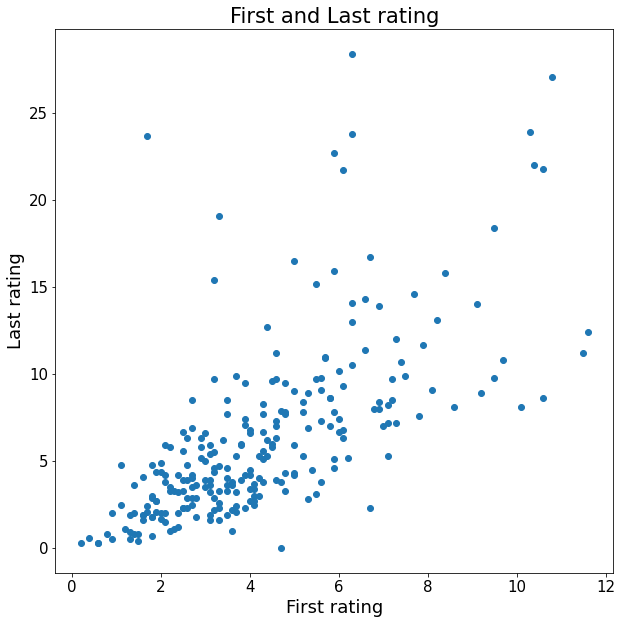

In [220]:
fig = plt.figure()

plt.figure(figsize=(10,10))
plt.scatter(rating2['First rating'], rating2['Last rating'])
plt.xlabel('First rating', fontsize = 18)
plt.ylabel('Last rating', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('First and Last rating', fontsize = 21)

Text(0.5, 1.0, 'First and Average rating')

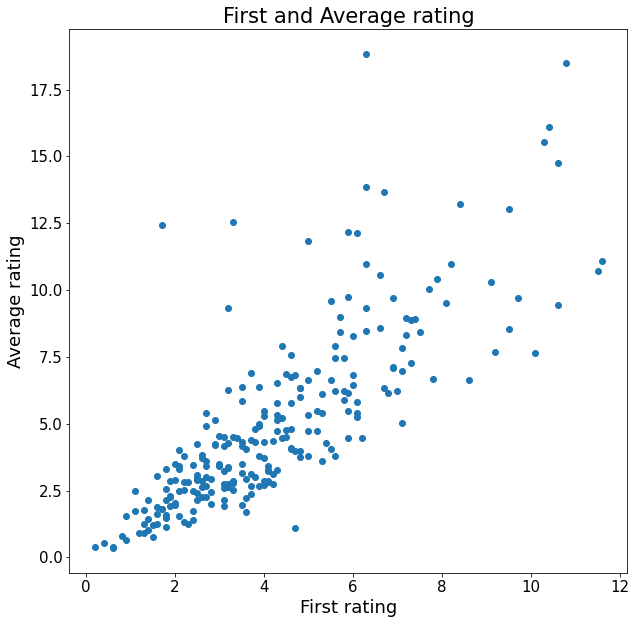

In [221]:
plt.figure(figsize=(10,10))
plt.scatter(rating2['First rating'], rating2['Average rating'])
plt.xlabel('First rating', fontsize = 18)
plt.ylabel('Average rating', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('First and Average rating', fontsize = 21)

### 위쪽 그림의 x 축은 드라마의 첫 회 시청률, y 축은 드라마의 마지막 시청률이다. 드라마 첫 회의 시청률이 높으면 대부분 마지막 회의 시청률 또한 높게 나왔다. 아래쪽 그림의 y축은 평균 드라마 시청률이다. 평균 시청률과 비교해 봤을 때도 첫 회 시청률과 관계가 있다는 것을 알 수 있다. 첫회 시청률이 높은 드라마는 대부분 첫회 시청률에 준하는 평균, 마지막 시청률을 보인다. 첫 회 시청률과 평균, 마지막 시청률간의 변화량을 보기 위해 아래 그래프를 그려 보았다

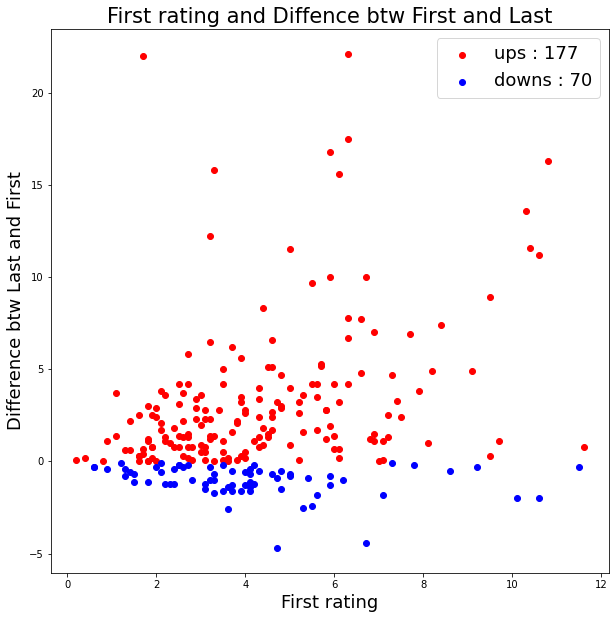

In [215]:
bad = rating2[rating2['Last-First'] < 0]
good = rating2[rating2['Last-First'] >= 0]
best = rating2[rating2['Last-First'] > 15]
worst = rating2[rating2['Last-First'] < -3]
exceptNeutral = rating2[abs(rating2['Last-First']) > 1.5]

plt.figure(figsize=(10,10))
plt.scatter(good['First rating'], good['Last-First'], c='r')
plt.scatter(bad['First rating'], bad['Last-First'],c='blue')
plt.xlabel('First rating', fontsize = 18)
plt.ylabel('Difference btw Last and First', fontsize = 18)
plt.title('First rating and Diffence btw First and Last', fontsize = 21)

#for i in range(len(best)):
#    msg = unicode('작품', 'utf-8')
#    plt.annotate(msg, (best.iloc[[i]]['First rating'], best.iloc[[i]]['Last-First']))

#plt.annotate(best['작품명'],(best['First rating'],best['Last-First']))
        
    
plt.legend(['ups : {}'.format(len(good)), 'downs : {}'.format(len(bad))], prop = {'size': 18})

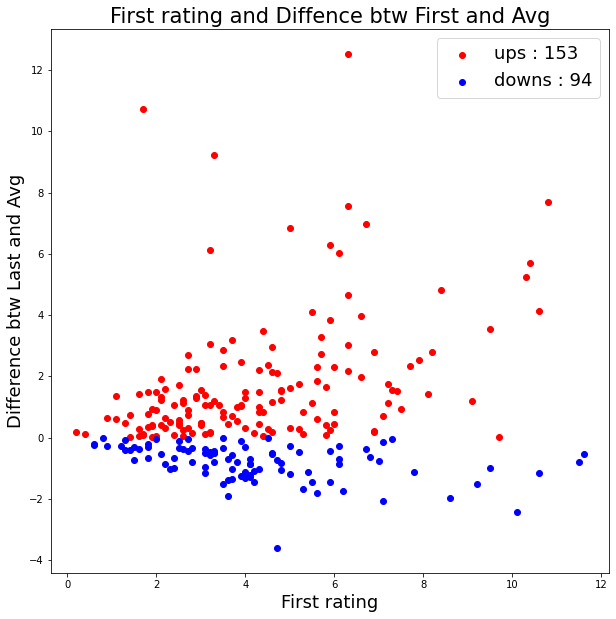

In [214]:
bad = rating2[rating2['Avg-First'] < 0]
good = rating2[rating2['Avg-First'] >= 0]
best = rating2[rating2['Avg-First'] > 15]
worst = rating2[rating2['Avg-First'] < -3]
exceptNeutral = rating2[abs(rating2['Avg-First']) > 1.5]

plt.figure(figsize=(10,10))
plt.scatter(good['First rating'], good['Avg-First'], c='r')
plt.scatter(bad['First rating'], bad['Avg-First'],c='blue')
plt.xlabel('First rating', fontsize = 18)
plt.ylabel('Difference btw Last and Avg', fontsize = 18)
plt.title('First rating and Diffence btw First and Avg', fontsize = 21)

#for i in range(len(best)):
#    msg = unicode('작품', 'utf-8')
#    plt.annotate(msg, (best.iloc[[i]]['First rating'], best.iloc[[i]]['Last-First']))

#plt.annotate(best['작품명'],(best['First rating'],best['Last-First']))
        
    
plt.legend(['ups : {}'.format(len(good)), 'downs : {}'.format(len(bad))], prop = {'size': 18})

### 위의 그래프는 첫 회 시청률에 따른 시청률 변화량을 나타낸다. 왼쪽 그림은 마지막 회 시청률과 첫 회의 시청률 의 차이값을 y 축으로 가진다. 오른쪽 그림은 평균 시청률과 첫 회의 시청률의 차이값을 y축으로 가진다. 첫 회의 시청률은 시청률 변화량과도 관계가 있어 보인다. 첫 회 시청률이 낮은 드라마같은 경우에는 시청률 상승 정도가 작다. 평균 시청률과 비교했을 때 첫 회 시청률이 2% 이내의 경우 상승폭도 대부분 2% 이내다. 2% 이상 시청률이 상승한 구간의 첫 회 시청률은 대부분 2% 이상이다. 
### 전체 데이터의 시청률 상승폭과 하락폭에는 큰 차이가 있다. 마지막 회 시청률을 기준으로 봤을 때 최대 상승폭은 22.1% , 평균 상슥폭은 3.36% 인 반면 최대 하락폭 4.7%, 평균 하락폭 1.03% 였다.  평균 시청률 기준으로는  최대 상승폭은 12.53% , 평균 상슥폭은 1.76% 인 반면 최대 하락폭 3.61%, 평균 하락폭 0.79% 였다.
### 즉, 첫 회 시청률이 높으면 드라마 흥행에 긍정적이라고 볼 수 있다. 하지만 최근 '영혼수선공' 이라는 드라마처럼 첫회 시청률이 4% 이상 준수하게 나왔음에도 최근 3년간 최대 시청률 하락을 기록한 경우도 있다. 드라마 첫 회의 시청률이 평균 시청률과 마지막회 시청률에 어느정도 관계가 있지만 핵심 지표는 아닐 것이다. 
### 대부분 드라마의 시청률은 상승한다. 마지막회 시청률 기준 72%의 드라마의 시청률이 상승했고 평균 시청률 기준으로는 62%의 드라마의 시청률이 상승했다.

## 탐색 2. 배우들 개인의 3년간 시청률

### 단순하게 생각해보자. 많은 작품을 출연한 사람일 수록 드라마에 베테랑이 아닐까? 라는 생각으로 위 데이터 드라마에 출연했던 배우들을 모두 모아보았고 개개인의 시청률 스탯을 완성했다. 

In [224]:
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_row',None)

rating = pd.read_csv('rating2.csv')
names = pd.read_json('Total_staffs_actors_V3.json')

def title_converter(titleList):
    newTitleList = []
    
    for title in titleList:
       
        s = title
        
        if '보좌관' in title or 'SKY' in title:
            pass
        elif '365' in title:
            s = '365:운명을거스르는1년'
        elif '검법남녀시즌2' == title:
            s = '검법남녀2'
        elif '보이스2' in title:
            s = '보이스2혐오의시대'
        elif 'VIP' in title:
            s = 'VIP'
        else :
            s = re.sub('\(.*\)','',s) # (dd)
            s = re.sub(',[0-9]','',s) # ,1
            s = s.strip('?') # ?
            s = re.sub('\:.*','',s) # :dd
            s = s.replace('!', '') # !
            s = re.sub('\-.*','',s) # -dd
            s = re.sub('[A-z]*','',s)
            s = s.strip('.')
            s = s.strip()
            s = s.replace(' ', '')

        newTitleList.append(s)
    return newTitleList

rating['key'] = title_converter(rating['작품명'])
rating.index = rating['key']
names.index = names['key']
rating.sort_index(inplace=True)
names.sort_index(inplace=True)

with open('Total_staffs_actors_V3.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    
temp_rating = rating.copy()  

lists = []
jlists = []
for index,row in temp_rating.iterrows():
    for d in data:
        if d['key'] == index:
            columns = row.index
            for c in columns:
                if c != 'key':
                    d[c] = row[c]

rating_names = pd.DataFrame(data)
story_data = rating_names[rating_names['First rating'] > 0]

actors_list = []
actors_dict = {}
for index, row in story_data.iterrows():
    avg = row['Average rating']
    first = row['First rating']
    last = row['Last rating']
    
    actors = row['출연']
    for a in actors:
        if a in actors_list:
            actor = actors_dict[a]
            actor['count'] += 1
            actor['avg sum'] += avg
            actor['first sum'] += first
            actor['last sum'] += last
            actor['mean avg'] = actor['avg sum'] / actor['count']
            actor['mean first'] = actor['first sum'] / actor['count']
            actor['mean last'] = actor['last sum'] / actor['count']
        else:
            actor = {}
            actor['count'] = 1
            actor['avg sum'] = avg
            actor['first sum'] = first
            actor['last sum'] = last
            actor['mean avg'] = actor['avg sum'] / actor['count']
            actor['mean first'] = actor['first sum'] / actor['count']
            actor['mean last'] = actor['last sum'] / actor['count']
            
            actors_list.append(a)
            actors_dict[a] = actor
            
pdData = pd.DataFrame(actors_dict)
names = pd.DataFrame(actors_dict).columns
ratings = pd.DataFrame(actors_dict).index
rating_list = [pdData.loc[i] for i in ratings]
mydata = pd.DataFrame(pd.concat(rating_list, axis = 1))
mydata.sort_values(by = ['count'], ascending=False, inplace=True)
mydata.drop(columns=['avg sum','first sum','last sum'], inplace=True)

mydata[:10]

,count,mean avg,mean first,mean last
안내상,12.0,4.629045,4.033333,5.858333
이준혁,11.0,5.680815,3.954545,7.627273
박수영,10.0,4.924375,4.590000,5.820000
남기애,9.0,5.062824,5.255556,5.588889
김원해,9.0,4.553990,4.455556,5.255556
조한철,8.0,5.128872,4.250000,6.837500
김선영,8.0,6.127943,3.875000,9.487500
전배수,8.0,7.551224,6.012500,10.062500
엄효섭,8.0,4.929297,4.387500,5.625000
김민상,8.0,5.735010,4.812500,7.000000


### 최근 3년간 가장 많은 작품을 진행한 10명의 데이터다. 물론 데이터를 테이블로 보는 것은 쉽지 않다. 따라서 드라마의 출연 횟수를 X축에, Y축에는 각 배우들의 평균 시청률, 초록 점은 배우 개인, 빨간 선은 횟수 별 배우들의 시청률 평균을 나타내었다.

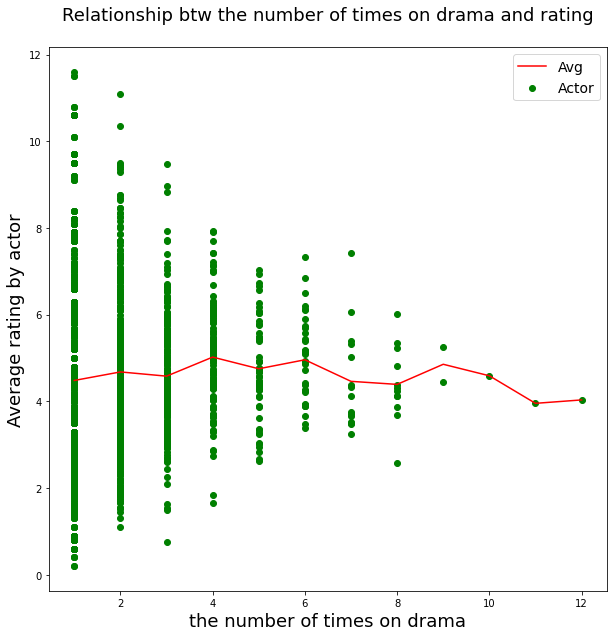

In [225]:
plt.figure(figsize = (10, 10))
plt.plot(mydata.groupby(by=['count']).mean()['mean first'],c='r')
plt.scatter(mydata['count'], mydata['mean first'], c='g')
plt.xlabel('the number of times on drama', fontsize = 18)
plt.ylabel('Average rating by actor', fontsize = 18)
plt.title('Relationship btw the number of times on drama and rating\n', fontsize = 18)
plt.legend(['Avg', 'Actor'], prop = {'size': 14})
plt.show()

### 나의 예상과는 다른 결과였다. 우선 8회 이상 다작을 한 배우의 수가 적었고 출연 횟수에 관계없이 평균 4~5%로 비슷했다. 즉, 다작한 배우라고 평균 시청률이 높지는 않았다. 위와 같은 플롯으로는 배우의 출연 횟수와 시청률간의 관계를 나타내기 힘들었다. 그래서 3-4회 출연 배우 그룹, 5-7회 출연 그룹, 8-12회 출연 그룹으로 나눠서 첫 회 시청률과 평균 시청률을 비교해 봤다.

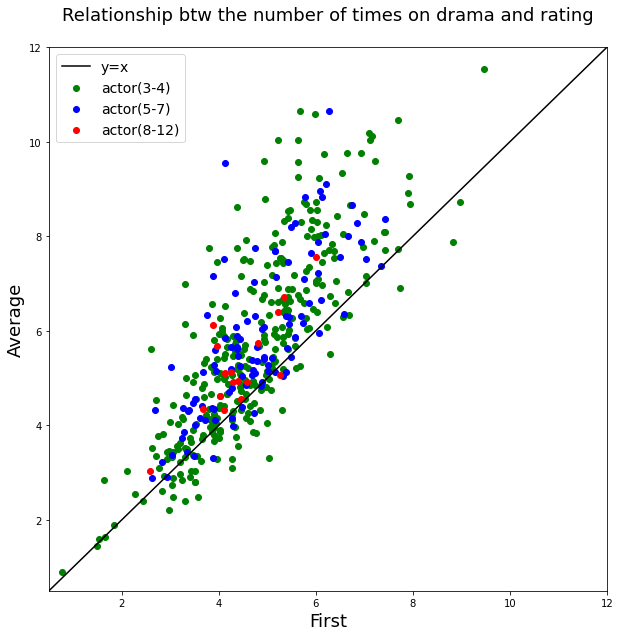

In [227]:
p3_4 = mydata[mydata['count'].map(lambda x : x>=3 and x<=4)]
p5_7 = mydata[mydata['count'].map(lambda x : x>=5 and x<=7)]
p8_12 = mydata[mydata['count'].map(lambda x : x>=8 and x<=12)]

plt.figure(figsize = (10, 10))
plt.scatter(p3_4['mean first'], p3_4['mean avg'], c='g')
plt.scatter(p5_7['mean first'], p5_7['mean avg'], c='blue')
plt.scatter(p8_12['mean first'], p8_12['mean avg'], c='r')
plt.plot([i for i in range(-1,13)], [i for i in range(-1,13)], c='black')
plt.xlim(0.5,12)
plt.ylim(0.5,12)
plt.xlabel('First', fontsize = 18)
plt.ylabel('Average', fontsize = 18)
plt.title('Relationship btw the number of times on drama and rating\n', fontsize = 18)
plt.legend(['y=x','actor(3-4)', 'actor(5-7)', 'actor(8-12)'], prop = {'size': 14})

### 플롯을 봤을때 각 색깔점이 고르게 분포되어 있음을 볼 수 있다. 어떤 군집 형태를 이루는 것이 아닌 모양으로 보아 출연 횟수와 첫 회, 평균 시청률간의 관계를 찾기는 쉽지 않다. 하지만 드라마 기준, 배우 기준으로 데이터를 모아 보았을때 첫 회 시청률과 평균 시청률에는 분명 선형의 관계가 있다고 볼 수 있다. 

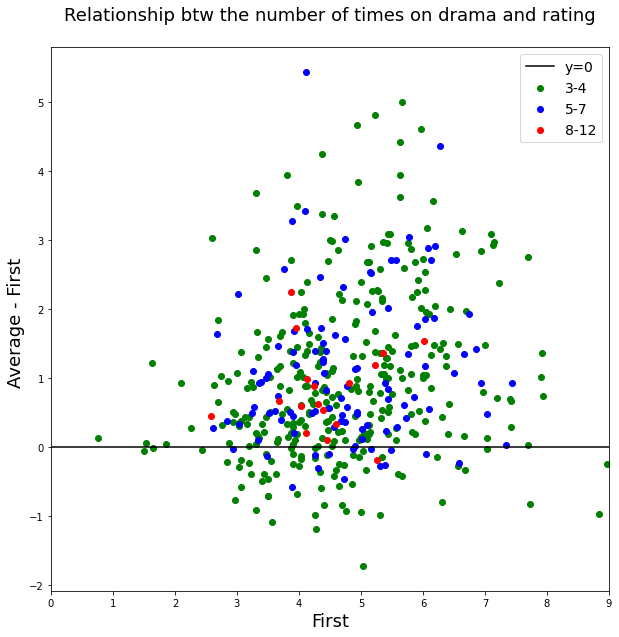

In [229]:
plt.figure(figsize = (10, 10))
plt.scatter(p3_4['mean first'], p3_4['mean avg'] - p3_4['mean first'], c='g')
plt.scatter(p5_7['mean first'], p5_7['mean avg'] - p5_7['mean first'], c='blue')
plt.scatter(p8_12['mean first'], p8_12['mean avg'] - p8_12['mean first'], c='r')
plt.plot([i for i in range(-1,11)], [i*0 for i in range(-1,11)], c='black')
plt.xlim(0,9)
plt.xlabel('First', fontsize = 18)
plt.ylabel('Average - First ', fontsize = 18)
plt.title('Relationship btw the number of times on drama and rating\n', fontsize = 18)
plt.legend(['y=0','3-4', '5-7', '8-12'], prop = {'size': 14})

### 시청률의 증감을 나타내는 플롯 또한 배우 기준으로 보아도 시청률이 증가하는 드라마가 더 많음을 볼 수 있다. 따라서 배우와 시청률 간에 상관관계를 찾지는 못했지만 배우 기준, 드라마 기준으로 첫 회 시청률과 마지막, 평균 시청률에는 선형의 상관관계를 볼 수 있었다.